# Generate Slashbin figure (Fig 2 in paper)

In [1]:
import pickle
import pandas as pd

pd.set_option("display.max_rows", 650)

df_slashbin_data = pd.read_pickle("slashbin_data.pkl")
# with open("slashbin_data.pkl", "rb") as pickle_file:
#     df_slashbin_data = pickle.load(pickle_file)

In [2]:
# Drop executions that didn't output the right number of files

pipelines = ["afni", "spm", "fsl"]
datasets = ["ds001545", "HCP", "preventAD"]
n_images = [1, 8, 16]

output_files = {}
for p in pipelines:
    output_files[p] = {}
    for d in datasets:
        output_files[p][d] = {}

# Correct output file numbers
output_files["afni"]["ds001545"][1] = 62
output_files["afni"]["HCP"][1] = 62
output_files["afni"]["preventAD"][1] = 62

output_files["afni"]["ds001545"][8] = 482
output_files["afni"]["HCP"][8] = 482
output_files["afni"]["preventAD"][8] = 482

output_files["afni"]["ds001545"][16] = 962
output_files["afni"]["HCP"][16] = 962
output_files["afni"]["preventAD"][16] = 962

output_files["spm"]["ds001545"][1] = 23
output_files["spm"]["HCP"][1] = 23
output_files["spm"]["preventAD"][1] = 23

output_files["spm"]["ds001545"][8] = 170
output_files["spm"]["HCP"][8] = 170
output_files["spm"]["preventAD"][8] = 170

output_files["spm"]["ds001545"][16] = 338
output_files["spm"]["HCP"][16] = 338
output_files["spm"]["preventAD"][16] = 338

output_files["fsl"]["ds001545"][1] = 564
output_files["fsl"]["HCP"][1] = 1361
output_files["fsl"]["preventAD"][1] = 344

output_files["fsl"]["ds001545"][8] = 4498
output_files["fsl"]["HCP"][8] = 6932
output_files["fsl"]["preventAD"][8] = 3179

output_files["fsl"]["ds001545"][16] = 8994
output_files["fsl"]["HCP"][16] = 10416
output_files["fsl"]["preventAD"][16] = 5987


def get_output_files(row):
    return output_files[row["pipeline"]][row["dataset"]][row["n_images"]]


df_slashbin_data["correct_n_outputfiles"] = df_slashbin_data.apply(
    get_output_files, axis=1
)
df_slashbin_data_clean = df_slashbin_data.loc[
    df_slashbin_data["n_outputfiles"] == df_slashbin_data["correct_n_outputfiles"]
]

In [3]:
# Show summary data
pd.set_option("display.max_rows", 650)
df_slashbin_data_clean.groupby(
    ["pipeline", "dataset", "n_images", "fs", "busy_writers"]
).count()

makespan  true_idx  \
pipeline dataset   n_images fs      busy_writers                       
afni     HCP       1        default 0                    5         5   
                                    6                    5         5   
                            sea     0                    4         4   
                                    6                    4         4   
                   8        default 0                    5         5   
                                    6                    5         5   
                            sea     0                    4         4   
                                    6                    4         4   
                   16       default 0                    5         5   
                                    6                    5         5   
                            sea     0                    5         5   
                                    6                    5         5   
         ds001545  1        default 0                    5         5   
                                    6                    5         5   
                            sea     0                    4         4   
                                    6                    4         4   
                   8        default 0                    5         5   
                                    6                    5         5   
                            sea     0                    4         4   
                                    6                    4         4   
                   16       default 0                    8         8   
                                    6                    8         8   
                            sea     0                    7         7   
                                    6                    7         7   
         preventAD 1        default 0                    5         5   
                                    6                    5         5   
                            sea     0                    4         4   
                                    6                    4         4   
                   8        default 0                    5         5   
                                    6                    5         5   
                            sea     0                    4         4   
                                    6                    4         4   
                   16       default 0                    8         8   
                                    6                    8         8   
                            sea     0                    7         7   
                                    6                    7         7   
fsl      HCP       1        default 0                    5         5   
                                    6                    6         6   
                            sea     0                    5         5   
                                    6                    5         5   
                   8        default 0                    6         6   
                                    6                    6         6   
                            sea     0                    5         5   
                                    6                    5         5   
                   16       default 0                    6         6   
                                    6                    6         6   
                            sea     0                    5         5   
                                    6                    5         5   
         ds001545  1        default 0                    6         6   
                                    6                    7         7   
                            sea     0                    5         5   
                                    6                    5         5   
                   8        default 0                    5         5   
                                    6                    5         5   
                  

In [4]:
# Peak at data
df_slashbin_data_clean[
    (df_slashbin_data_clean["pipeline"] == "fsl")
    & (df_slashbin_data_clean["dataset"] == "HCP")
    & (df_slashbin_data_clean["n_images"] == 1)
    & (df_slashbin_data_clean["fs"] == "sea")
    & (df_slashbin_data_clean["busy_writers"] == 6)
]

,fs,pipeline,dataset,n_images,busy_writers,makespan,true_idx,output_size,n_outputfiles,avg_fs,std_fs,p_cpu,t_cpu,fs_busy,correct_n_outputfiles
226,sea,fsl,HCP,1,6,6802.989994,122,1607.931471,1361,1.238823e+06,3.116241e+07,168.012064,10752.772065,sea_6,1361
228,sea,fsl,HCP,1,6,6752.100000,123,1607.931472,1361,1.238823e+06,3.116241e+07,167.942400,10748.313630,sea_6,1361
230,sea,fsl,HCP,1,6,6793.799994,124,1607.932442,1361,1.238824e+06,3.116242e+07,168.182205,10763.661123,sea_6,1361
231,sea,fsl,HCP,1,6,6775.788943,125,1607.921248,1361,1.238815e+06,3.116235e+07,168.361365,10775.127369,sea_6,1361
234,sea,fsl,HCP,1,6,6762.899975,126,1607.926508,1361,1.238819e+06,3.116237e+07,168.117699,10759.532768,sea_6,1361


In [5]:
pd.set_option("display.max_rows", 20)

# Merge sea and default on the following columns
# true_idx is the repetition index
merge_cols = ["dataset", "pipeline", "n_images", "busy_writers", "true_idx"]

sea = df_slashbin_data_clean[df_slashbin_data_clean["fs"] == "sea"]
default = df_slashbin_data_clean[df_slashbin_data_clean["fs"] == "default"]
df_merged = sea.merge(default, on=merge_cols, how="inner")[
    merge_cols + ["makespan_x", "makespan_y"]
]

### Figure Generation Code

Cells below include the original and latest code to generate the figures for the paper

In [6]:
def feature_scatter(df, zoom=False, fn="figure.pdf"):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    import matplotlib.lines as mlines
    from matplotlib.colors import to_rgba

    df_nb = df[df["busy_writers"] == 0]
    df = df[df["busy_writers"] == 6]
    
    identity = None
    
    if len(df) > 0:
        identity = range(int(max(df["makespan"])) + 1)

    colours = { "afni":"#003f5c", "spm": "#bc5090", "fsl": "#ffa600" }
    markers = { "preventAD":"^", "ds001545": "X", "HCP": "o" }
    edge = "black"
    line = { 1: 1.5, 8: 0, 16: 2}
    size = { 1: 12, 8: 8*12, 16: 8*12}
    alpha = 0.5
    
    if identity is not None:
        plt.plot(identity, identity, color="black", alpha=0.5, zorder=-1)
    
    if zoom:
        plt.text(1100, 1250, "y=x", rotation=34.5)
    else:
        plt.text(10000, 10500, "y=x", rotation=34)
    for pipeline in ["afni", "spm", "fsl"]:
        for dataset in ["preventAD", "ds001545", "HCP"]:

            for n_images in [1, 8, 16]:
                data = (df[(df["pipeline"] == pipeline)
                           & (df["dataset"] == dataset)
                           & (df["n_images"] == n_images)])
                
                plt.scatter(data["makespan"],
                    data["sea_makespan"],
                    c=[to_rgba(colours[pipeline], alpha=alpha)],
                    s=size[n_images],
                    marker=markers[dataset],
                    edgecolors=colours[pipeline],
                    linewidth=line[n_images],
                    label=f"{pipeline} - {dataset} - {n_images}")
                
    plt.scatter(df_nb["makespan"],
                df_nb["sea_makespan"],
                c="black",
                s=4,
                label="nobusy")

    p_marker = 's'
    afni_patch = mpatches.Patch(color=colours["afni"], label='AFNI', alpha=alpha)
    spm_patch = mpatches.Patch(color=colours["spm"], label='SPM', alpha=alpha)
    fsl_patch = mpatches.Patch(color=colours["fsl"], label='FSL', alpha=alpha)
        
    preventad_line = mlines.Line2D([], [], color='black',
                                   marker=markers["preventAD"],
                                   markersize=10, linestyle='None', alpha=alpha,
                                   label='preventAD')
    ds001545_line = mlines.Line2D([], [], color='black', marker=markers["ds001545"],
                                   markersize=10, linestyle='None', alpha=alpha,
                                   label='ds001545')
    hcp_line = mlines.Line2D([], [], color='black', marker=markers["HCP"],
                                   markersize=10, linestyle='None', alpha=alpha,
                                   label='HCP')
    
    nb_line = mlines.Line2D([], [], color='black', marker=".",
                            markersize=4, linestyle='None',
                            label='Without busy writers')
    
    im1_line = mlines.Line2D([], [],
                             color=to_rgba('black', alpha=alpha),
                             marker=p_marker,
                             markersize=4,
                             markeredgewidth=line[1],
                             linestyle='None',
                             label='1 process')
    im8_line = mlines.Line2D([], [],
                             color=to_rgba('black', alpha=alpha),
                             marker=p_marker,
                             markersize=9,
                             markeredgewidth=line[8],
                             linestyle='None',
                             label='8 processes')
    im16_line = mlines.Line2D([], [],
                              color=to_rgba('black', alpha=alpha),
                              marker=p_marker,
                              markersize=9,
                              markeredgewidth=line[16],
                              linestyle='None',
                              label='16 processes')

    if zoom:
        plt.xlim(0, 3000)
        plt.ylim(0, 3000)
        
    if zoom:
        bbox_pl = (1.2, 0.85)
        bbox_files = (1.32, 0.44)
    else:
        bbox_pl = (1.2, 0.85)
        bbox_files = (0.99, 0.44)
    
    lgd_pipelines = plt.legend(handles=[afni_patch, spm_patch, fsl_patch],
                               bbox_to_anchor=bbox_pl,
                               title="Pipelines",
                               frameon=False,
                               loc="center right"
                               )
    lgd_datasets = plt.legend(handles=[preventad_line, 
                                       ds001545_line,
                                       hcp_line],
                              bbox_to_anchor=(1.29, 0.73),
                              title="Datasets",
                              frameon=False
                             )

        
    lgd_files = plt.legend(handles=[im1_line, im8_line, im16_line],
                           bbox_to_anchor=bbox_files,
                           title="Parallelism",
                           frameon=False
                          )
    
    lgd_other = plt.legend(handles=[nb_line],
                           bbox_to_anchor=(1.435, 0.14),
                           frameon=False,
                           title="Other"
                          )
    lgd_pipelines._legend_box.align = "left"
    lgd_datasets._legend_box.align = "left"
    lgd_files._legend_box.align = "left"
    lgd_other._legend_box.align = "left"
    
    plt.gca().add_artist(lgd_pipelines)
    plt.gca().add_artist(lgd_datasets)
    plt.gca().add_artist(lgd_files)
    plt.gca().add_artist(lgd_other)
    plt.xlabel("Baseline makespan (s)")
    plt.ylabel("Sea makespan (s)")

    #plt.legend()
    plt.savefig(fn, bbox_extra_artists=(lgd_pipelines, lgd_datasets, lgd_files, lgd_other), bbox_inches='tight')
    plt.show()

(0.0, 25000.0)

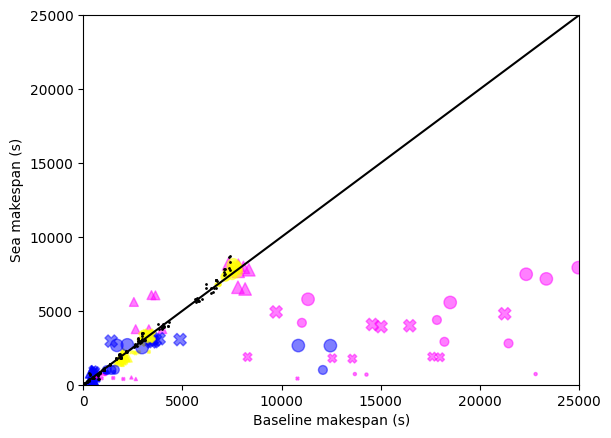

In [7]:
# Plot figure 2

from matplotlib import pyplot as plt
import numpy as np

# Set color by pipeline

colors = {}
colors["afni"] = "blue"
colors["spm"] = "magenta"
colors["fsl"] = "yellow"


def get_color(pipeline):
    return colors[pipeline]


df_merged["color"] = df_merged["pipeline"].apply(get_color)

# Split by dataset to be able to specify a different marker for each dataset
df_preventad_merged = df_merged[
    (df_merged["dataset"] == "preventAD") & (df_merged["busy_writers"] == 6)
]
df_hcp_merged = df_merged[
    (df_merged["dataset"] == "HCP") & (df_merged["busy_writers"] == 6)
]
df_ds_merged = df_merged[
    (df_merged["dataset"] == "ds001545") & (df_merged["busy_writers"] == 6)
]

# Plot datasets individually, with different markers
plt.scatter(
    df_preventad_merged["makespan_y"],
    df_preventad_merged["makespan_x"],
    color=df_preventad_merged["color"],
    s=df_preventad_merged["n_images"].astype("float") * 5,
    marker="^",
    alpha=0.5,
)
plt.scatter(
    df_ds_merged["makespan_y"],
    df_ds_merged["makespan_x"],
    color=df_ds_merged["color"],
    s=df_ds_merged["n_images"].astype("float") * 5,
    marker="X",
    alpha=0.5,
)
plt.scatter(
    df_hcp_merged["makespan_y"],
    df_hcp_merged["makespan_x"],
    color=df_hcp_merged["color"],
    s=df_hcp_merged["n_images"].astype("float") * 5,
    marker="o",
    alpha=0.5,
)

# Plot busy writers separately, in plain black
df_no_busy = df_merged[df_merged["busy_writers"] == 0]
plt.scatter(
    df_no_busy["makespan_y"], df_no_busy["makespan_x"], color="k", s=1, marker="o"
)

# Plot midline and add labels
plt.plot(np.arange(25000), np.arange(25000), color="k")
plt.xlabel("Baseline makespan (s)")
plt.ylabel("Sea makespan (s)")
plt.xlim(0, 25000)
plt.ylim(0, 25000)

### Paper figures

In [8]:
# data configuration

df_runs = pd.read_pickle('slashbin_data.pkl')
df_base = df_runs[df_runs["fs"] == "default"].set_index("true_idx")
df_sea = df_runs[df_runs["fs"] == "sea"].set_index("true_idx")
df_base["speedup"] = df_base["makespan"].divide(df_sea["makespan"])
df_base["sea_makespan"] = df_sea["makespan"]
df_plot =df_base

#### Slashbin no zoom

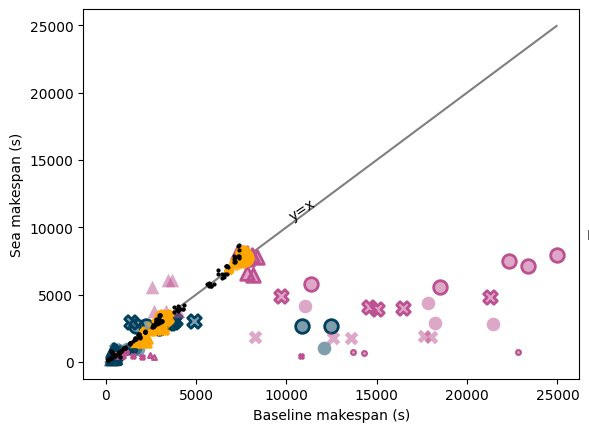

In [9]:
feature_scatter(df_plot, zoom=False, fn='../figures/slashbin_nozoom_updated.pdf')

#### Slashbin with zoom

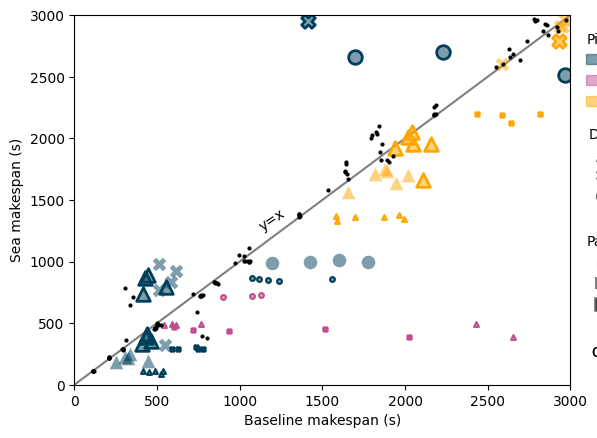

In [10]:
feature_scatter(df_plot, zoom=True, fn='../figures/slashbin_withzoom_updated.pdf')

# Calculate speed-up between Sea and baseline


In [11]:
df_merged["speed_up"] = df_merged["makespan_y"] / df_merged["makespan_x"]

In [12]:
df_merged["speed_up"].describe()

count    285.000000
mean       1.801711
std        3.111911
min        0.393041
25%        0.967265
50%        1.021863
75%        1.214795
max       31.627009
Name: speed_up, dtype: float64

<Axes: >

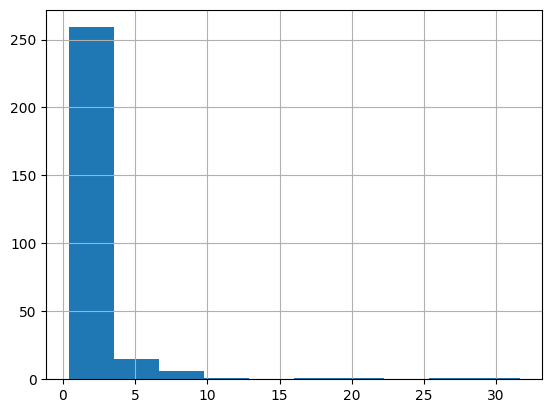

In [13]:
df_merged["speed_up"].hist()

In [14]:
pd.set_option("display.max_rows", 650)

df_merged.sort_values(by="speed_up", ascending=False)

,dataset,pipeline,n_images,busy_writers,true_idx,makespan_x,makespan_y,color,speed_up
56,HCP,spm,1,6,68,721.089015,22805.888935,magenta,31.627009
228,ds001545,spm,1,6,279,417.989024,10802.088953,magenta,25.842997
60,HCP,spm,1,6,72,686.300012,14280.587897,magenta,20.808083
61,HCP,spm,1,6,73,722.300013,13695.988925,magenta,18.961635
131,HCP,afni,8,6,162,999.689002,12082.899953,blue,12.086659
8,ds001545,spm,8,6,11,1858.088643,17989.688823,magenta,9.681825
5,ds001545,spm,8,6,6,1896.489566,17592.488991,magenta,9.276344
6,ds001545,spm,8,6,8,1764.599709,13568.292945,magenta,7.689162
205,HCP,spm,8,6,252,2796.398961,21440.887864,magenta,7.667321
4,ds001545,spm,8,6,5,1790.999913,12558.999904,magenta,7.012284


### T-test results

#### Overall

In [15]:
from scipy.stats import ttest_ind

ttest_ind(df_plot.dropna().loc[df_plot['pipeline'] == 'fsl']['makespan'], df_plot.loc[df_plot['pipeline'] == 'fsl'].dropna()['sea_makespan'])

TtestResult(statistic=-0.22782430713471163, pvalue=0.820002403763443, df=212.0)

In [16]:
ttest_ind(df_plot.dropna().loc[df_plot['pipeline'] == 'spm']['makespan'], df_plot.loc[df_plot['pipeline'] == 'spm'].dropna()['sea_makespan'])

TtestResult(statistic=4.31951050647439, pvalue=2.3841425970228604e-05, df=216.0)

In [17]:
ttest_ind(df_plot.dropna().loc[df_plot['pipeline'] == 'afni']['makespan'], df_plot.loc[df_plot['pipeline'] == 'afni'].dropna()['sea_makespan'])

TtestResult(statistic=1.597724023372283, pvalue=0.11166749388806006, df=202.0)

##### With busy writers

In [18]:
pipeline = 'fsl'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=0.2754201114650564, pvalue=0.7835296661204674, df=106.0)

In [19]:
pipeline = 'spm'
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=5.228365950910425, pvalue=9.680331039766726e-07, df=98.0)

In [20]:
pipeline = 'afni'
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=1.806646003885833, pvalue=0.07382502695620996, df=100.0)

#### No Busy Writers

In [21]:
pipeline = 'fsl'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=-0.5885801497361461, pvalue=0.5574190988812253, df=104.0)

In [22]:
pipeline = 'spm'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=0.07157083148084459, pvalue=0.9430667044762924, df=116.0)

In [23]:
pipeline = 'afni'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=-0.004941957367942029, pvalue=0.99606674998922, df=100.0)

#### Busy writers by dataset and pipeline

In [24]:
pipeline = 'fsl'
data = 'HCP'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-0.6522087086124057, pvalue=0.518651863297516, df=34.0)

In [25]:
pipeline = 'fsl'
data = 'preventAD'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=3.402835606604564, pvalue=0.0017231680155705069, df=34.0)

In [26]:
pipeline = 'fsl'
data = 'ds001545'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=1.861724462015218, pvalue=0.07130473118466066, df=34.0)

In [27]:
pipeline = 'spm'
data = 'HCP'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=5.012637785272209, pvalue=2.6791440875897928e-05, df=28.0)

In [28]:
pipeline = 'spm'
data = 'preventAD'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-0.10468206030310204, pvalue=0.917209169500103, df=36.0)

In [29]:
pipeline = 'spm'
data = 'ds001545'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=4.472413708751753, pvalue=0.00010284100520481638, df=30.0)

In [30]:
pipeline = 'afni'
data = 'HCP'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=1.9004180071224765, pvalue=0.06771974265867814, df=28.0)

In [31]:
pipeline = 'afni'
data = 'preventAD'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=1.0449843701029158, pvalue=0.30340312739413783, df=34.0)

In [32]:
pipeline = 'afni'
data = 'ds001545'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=0.56771308450475, pvalue=0.5739598643370157, df=34.0)

#### No busy writers by dataset and pipeline

In [33]:
pipeline = 'fsl'
data = 'HCP'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-3.8931479607261448, pvalue=0.0004724099680599743, df=32.0)

In [34]:
pipeline = 'fsl'
data = 'preventAD'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-1.3194230283304942, pvalue=0.1958442676270688, df=34.0)

In [35]:
pipeline = 'fsl'
data = 'ds001545'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-1.4672747132184851, pvalue=0.1514914014499189, df=34.0)

In [36]:
pipeline = 'spm'
data = 'HCP'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=0.03702035522988449, pvalue=0.9706625763952558, df=38.0)

In [37]:
pipeline = 'spm'
data = 'preventAD'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=0.026009741325573148, pvalue=0.9793856820464355, df=38.0)

In [38]:
pipeline = 'spm'
data = 'ds001545'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=0.08112346100112261, pvalue=0.9357931074463524, df=36.0)

In [39]:
pipeline = 'afni'
data = 'HCP'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=0.05865826059307895, pvalue=0.9536409466515597, df=28.0)

In [40]:
pipeline = 'afni'
data = 'preventAD'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-0.2126347079847605, pvalue=0.8328816321617549, df=34.0)

In [41]:
pipeline = 'fsl'
data = 'ds001545'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-1.4672747132184851, pvalue=0.1514914014499189, df=34.0)

In [42]:
df_plot

,fs,pipeline,dataset,n_images,busy_writers,makespan,output_size,n_outputfiles,avg_fs,std_fs,p_cpu,t_cpu,fs_busy,speedup,sea_makespan
true_idx,,,,,,,,,,,,,,,
0,default,afni,ds001545,8,6,511.200015,24507.452102,482,5.331520e+07,1.739138e+08,130.422306,8347.027589,default_6,0.664069,769.800005
1,default,afni,ds001545,8,6,612.400015,24507.452409,482,5.331520e+07,1.739138e+08,132.684421,8491.802929,default_6,0.664000,922.289008
2,default,afni,ds001545,8,6,513.100018,24507.452226,482,5.331520e+07,1.739138e+08,150.436336,9627.925499,default_6,0.521873,983.189005
3,default,afni,ds001545,8,6,546.800016,24507.452113,482,5.331520e+07,1.739138e+08,178.664953,11434.556975,default_6,1.689777,323.593030
4,default,afni,ds001545,8,6,583.588017,24507.452288,482,5.331520e+07,1.739138e+08,130.030174,8321.931137,default_6,0.702356,830.900006
5,default,spm,ds001545,8,6,12558.999904,5955.099419,170,3.673161e+07,9.323773e+07,1483.180510,94923.552632,default_6,7.012284,1790.999913
6,default,spm,ds001545,8,6,17592.488991,5955.099421,170,3.673161e+07,9.323773e+07,1595.549988,102115.199201,default_6,9.276344,1896.489566
8,default,spm,ds001545,8,6,13568.292945,5955.099420,170,3.673161e+07,9.323773e+07,1540.053827,98563.444903,default_6,7.689162,1764.599709
10,default,spm,ds001545,8,6,8285.687976,5955.099420,170,3.673161e+07,9.323773e+07,1518.380412,97176.346336,default_6,4.415763,1876.388828


In [43]:
df_merged.groupby(by=['dataset', 'pipeline', 'n_images', 'busy_writers'])['speed_up'].mean().sort_values(ascending=False)

dataset    pipeline  n_images  busy_writers
HCP        spm       1         6               12.617431
ds001545   spm       8         6                7.615075
                     1         6                6.571933
HCP        spm       8         6                5.160400
preventAD  afni      1         6                4.271394
HCP        afni      8         6                4.074774
ds001545   spm       16        6                3.585750
HCP        spm       16        6                2.937354
preventAD  spm       1         6                2.828866
ds001545   afni      1         6                2.369637
HCP        afni      16        6                2.291281
preventAD  afni      8         6                1.622492
HCP        afni      1         6                1.475868
preventAD  fsl       1         6                1.345780
ds001545   fsl       1         6                1.261522
           afni      16        6                1.150132
preventAD  fsl       8         6            

### T-test results

#### Overall

In [44]:
from scipy.stats import ttest_ind

ttest_ind(df_plot.dropna().loc[df_plot['pipeline'] == 'fsl']['makespan'], df_plot.loc[df_plot['pipeline'] == 'fsl'].dropna()['sea_makespan'])

TtestResult(statistic=-0.22782430713471163, pvalue=0.820002403763443, df=212.0)

In [45]:
ttest_ind(df_plot.dropna().loc[df_plot['pipeline'] == 'spm']['makespan'], df_plot.loc[df_plot['pipeline'] == 'spm'].dropna()['sea_makespan'])

TtestResult(statistic=4.31951050647439, pvalue=2.3841425970228604e-05, df=216.0)

In [46]:
ttest_ind(df_plot.dropna().loc[df_plot['pipeline'] == 'afni']['makespan'], df_plot.loc[df_plot['pipeline'] == 'afni'].dropna()['sea_makespan'])

TtestResult(statistic=1.597724023372283, pvalue=0.11166749388806006, df=202.0)

##### With busy writers

In [47]:
pipeline = 'fsl'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=0.2754201114650564, pvalue=0.7835296661204674, df=106.0)

In [48]:
pipeline = 'spm'
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=5.228365950910425, pvalue=9.680331039766726e-07, df=98.0)

In [49]:
pipeline = 'afni'
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=1.806646003885833, pvalue=0.07382502695620996, df=100.0)

#### No Busy Writers

In [50]:
pipeline = 'fsl'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=-0.5885801497361461, pvalue=0.5574190988812253, df=104.0)

In [51]:
pipeline = 'spm'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=0.07157083148084459, pvalue=0.9430667044762924, df=116.0)

In [52]:
pipeline = 'afni'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)].dropna()['sea_makespan'])

TtestResult(statistic=-0.004941957367942029, pvalue=0.99606674998922, df=100.0)

#### Busy writers by dataset and pipeline

In [53]:
pipeline = 'fsl'
data = 'HCP'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-0.6522087086124057, pvalue=0.518651863297516, df=34.0)

In [54]:
pipeline = 'fsl'
data = 'preventAD'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=3.402835606604564, pvalue=0.0017231680155705069, df=34.0)

In [55]:
pipeline = 'fsl'
data = 'ds001545'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=1.861724462015218, pvalue=0.07130473118466066, df=34.0)

In [56]:
pipeline = 'spm'
data = 'HCP'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=5.012637785272209, pvalue=2.6791440875897928e-05, df=28.0)

In [57]:
pipeline = 'spm'
data = 'preventAD'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-0.10468206030310204, pvalue=0.917209169500103, df=36.0)

In [58]:
pipeline = 'spm'
data = 'ds001545'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=4.472413708751753, pvalue=0.00010284100520481638, df=30.0)

In [59]:
pipeline = 'afni'
data = 'HCP'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=1.9004180071224765, pvalue=0.06771974265867814, df=28.0)

In [60]:
pipeline = 'afni'
data = 'preventAD'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=1.0449843701029158, pvalue=0.30340312739413783, df=34.0)

In [61]:
pipeline = 'afni'
data = 'ds001545'
busyw = 6
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=0.56771308450475, pvalue=0.5739598643370157, df=34.0)

#### No busy writers by dataset and pipeline

In [62]:
pipeline = 'fsl'
data = 'HCP'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-3.8931479607261448, pvalue=0.0004724099680599743, df=32.0)

In [63]:
pipeline = 'fsl'
data = 'preventAD'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-1.3194230283304942, pvalue=0.1958442676270688, df=34.0)

In [64]:
pipeline = 'fsl'
data = 'ds001545'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-1.4672747132184851, pvalue=0.1514914014499189, df=34.0)

In [65]:
pipeline = 'spm'
data = 'HCP'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=0.03702035522988449, pvalue=0.9706625763952558, df=38.0)

In [66]:
pipeline = 'spm'
data = 'preventAD'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=0.026009741325573148, pvalue=0.9793856820464355, df=38.0)

In [67]:
pipeline = 'spm'
data = 'ds001545'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=0.08112346100112261, pvalue=0.9357931074463524, df=36.0)

In [68]:
pipeline = 'afni'
data = 'HCP'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=0.05865826059307895, pvalue=0.9536409466515597, df=28.0)

In [69]:
pipeline = 'afni'
data = 'preventAD'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-0.2126347079847605, pvalue=0.8328816321617549, df=34.0)

In [70]:
pipeline = 'fsl'
data = 'ds001545'
busyw = 0
ttest_ind(df_plot.dropna().loc[(df_plot['pipeline'] == pipeline)
                               & (df_plot['busy_writers'] == busyw)
                               & (df_plot['dataset'] == data)]['makespan'],
          df_plot.loc[(df_plot['pipeline'] == pipeline)
                      & (df_plot['busy_writers'] == busyw)
                      & (df_plot['dataset'] == data)].dropna()['sea_makespan'])

TtestResult(statistic=-1.4672747132184851, pvalue=0.1514914014499189, df=34.0)

In [71]:
df_plot

,fs,pipeline,dataset,n_images,busy_writers,makespan,output_size,n_outputfiles,avg_fs,std_fs,p_cpu,t_cpu,fs_busy,speedup,sea_makespan
true_idx,,,,,,,,,,,,,,,
0,default,afni,ds001545,8,6,511.200015,24507.452102,482,5.331520e+07,1.739138e+08,130.422306,8347.027589,default_6,0.664069,769.800005
1,default,afni,ds001545,8,6,612.400015,24507.452409,482,5.331520e+07,1.739138e+08,132.684421,8491.802929,default_6,0.664000,922.289008
2,default,afni,ds001545,8,6,513.100018,24507.452226,482,5.331520e+07,1.739138e+08,150.436336,9627.925499,default_6,0.521873,983.189005
3,default,afni,ds001545,8,6,546.800016,24507.452113,482,5.331520e+07,1.739138e+08,178.664953,11434.556975,default_6,1.689777,323.593030
4,default,afni,ds001545,8,6,583.588017,24507.452288,482,5.331520e+07,1.739138e+08,130.030174,8321.931137,default_6,0.702356,830.900006
5,default,spm,ds001545,8,6,12558.999904,5955.099419,170,3.673161e+07,9.323773e+07,1483.180510,94923.552632,default_6,7.012284,1790.999913
6,default,spm,ds001545,8,6,17592.488991,5955.099421,170,3.673161e+07,9.323773e+07,1595.549988,102115.199201,default_6,9.276344,1896.489566
8,default,spm,ds001545,8,6,13568.292945,5955.099420,170,3.673161e+07,9.323773e+07,1540.053827,98563.444903,default_6,7.689162,1764.599709
10,default,spm,ds001545,8,6,8285.687976,5955.099420,170,3.673161e+07,9.323773e+07,1518.380412,97176.346336,default_6,4.415763,1876.388828
